# 4 线性模型选择与正则化

## 4.1 子集选择方法

### 4.1.1 最优子集选择

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.3.3"

利用Hitters(棒球)数据集实践最优子集选择方法。本实验旨在使用若干个与棒球运动员上一年比赛成绩相关的变量来预测该棒球运动员的Salary(薪水)。

In [2]:
str(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

In [3]:
# 59个运动员的Salary变量值缺失
sum(is.na(Hitters$Salary))

[1] 59

In [4]:
# 使用na.omit()函数删除在任何变量上存在缺失值的观测
Hitters <- na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))

[1] 263  20

[1] 0

`leaps`包中的`regsubset()`函数可以实现最优预测变量子集的筛选（最优用RSS来量化）

In [5]:
# 星号表示列对应的变量包含于行对应的模型当中，例如最优的两变量模型包含Hits（前一年安打数）和CRBI（职业生涯总跑垒数）；结果默认至最优八变量模型
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Warning message:
"package 'leaps' was built under R version 3.3.3"

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

In [6]:
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

In [7]:
# summary()函数返回了相应模型的R2、RSS、调整R2、CP、BIC，可以通过对比这些统计量来选出整体上最优的模型
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 11

[1] 10

[1] 6

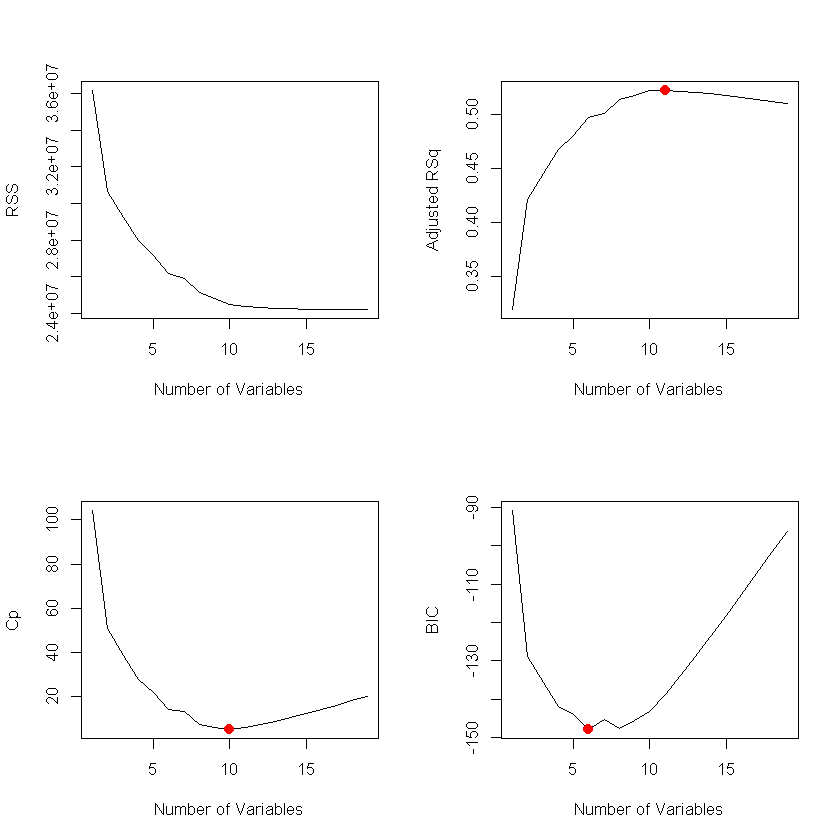

In [8]:
# 同时画出所有模型的RSS、调整R2、CP以及BIC，辅助确定最终选择哪一个模型
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)
which.min(reg.summary$bic)

par(mfrow=c(2,2))

plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS",type="l")

plot(reg.summary$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")
points(11,reg.summary$adjr2[11], col="red",cex=2,pch=20)

plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
points(10,reg.summary$cp[10],col="red",cex=2,pch=20)

plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(6,reg.summary$bic[6],col="red",cex=2,pch=20)

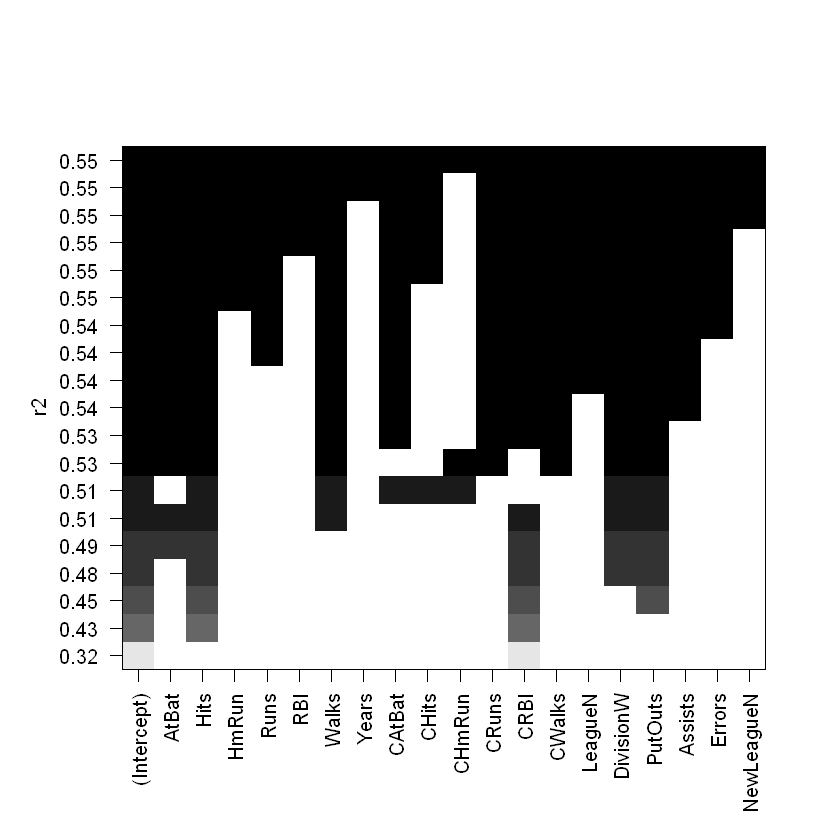

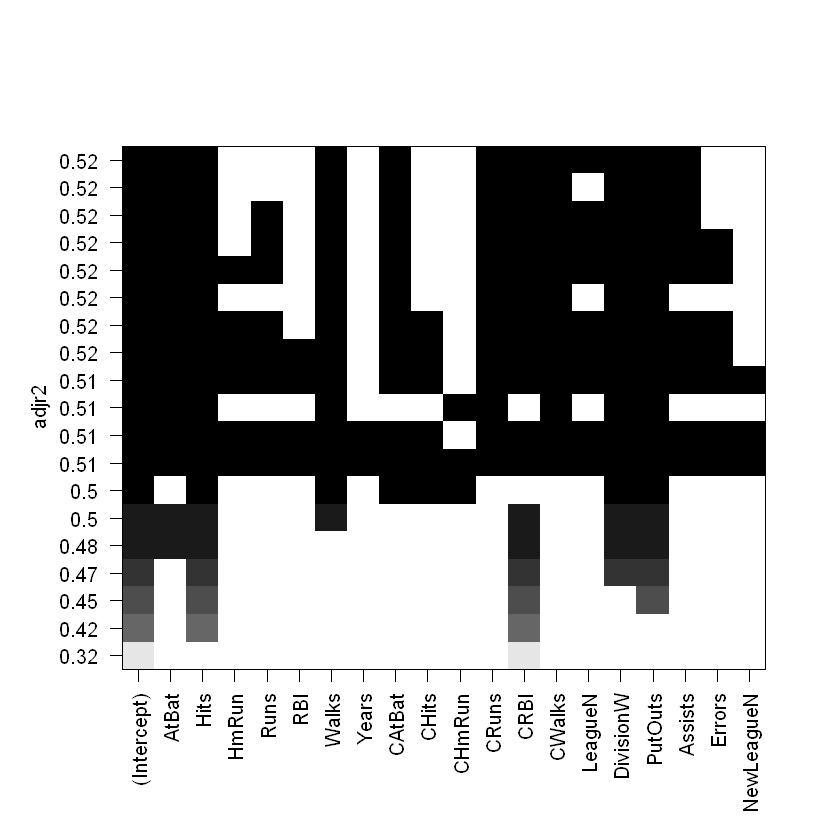

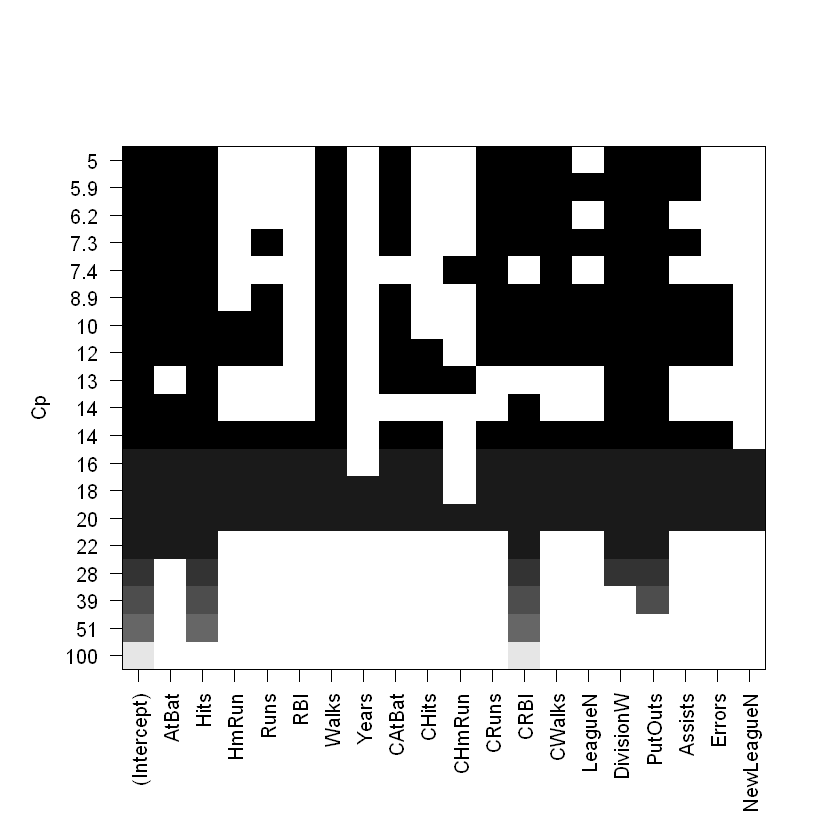

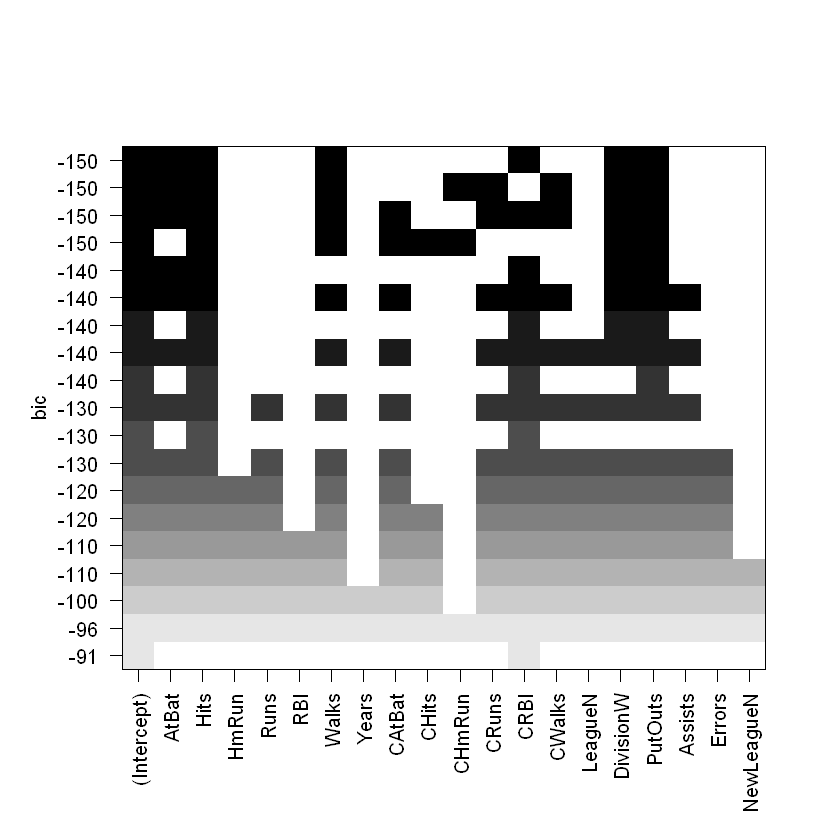

In [9]:
# regsubsets()函数有一个内置的plot()命令，使用该命令可以输出按照BIC、CP、调整R2或AIC排序后，包含给定个数预测变量的最优模型所包含变量的情况
# 每个图像的第一行的黑色方块表示根据相应统计指标选择的最优模型所包含的变量
# 例如，多个模型的BIC都接近-150，而BIC最小的模型包含AtBat、Hits、Walks、CRBI、Division、PutOuts六变量

#par(mfrow=c(2,2))

plot(regfit.full,scale="r2")
plot(regfit.full,scale="adjr2")
plot(regfit.full,scale="Cp")
plot(regfit.full,scale="bic")

In [10]:
# 使用coef()函数可以提取最优的六变量模型的参数估计值
coef(regfit.full, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

### 4.1.2 向前逐步选择和向后逐步选择

In [11]:
# 向前逐步选择和向后逐步选择可以分别通过设定regsubsets()函数中的参数method="forward"和method="backward"来实现
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [12]:
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [13]:
# 对于这个数据集而言，使用最优子集、向前、向后选择所得的单变量到六变量模型结果一致，但是七变量模型结果不一致
coef(regfit.full,7)

coef(regfit.fwd,7)

coef(regfit.bwd,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

### 4.1.3 使用验证集方法和交叉验证选择模型

#### 4.1.3.1 验证集

In [14]:
# 切分训练集、验证集
set.seed(1)
train <- sample(c(TRUE,FALSE), nrow(Hitters), rep=TRUE)
test <- (!train)

In [15]:
# 使用regsubset()函数，在训练集上完成模型的最优子集选择
regfit.best <- regsubsets(Salary~., data=Hitters[train, ], nvmax=19)

In [16]:
# 计算在不同模型大小的情况下，最优模型的验证集误差：使用测试数据生成一个回归设计矩阵
test.mat <- model.matrix(Salary~.,data=Hitters[test,])

`model.matrix()`函数在很多回归程序包中都用于生成回归设计矩阵`"X" `。完成以上步骤后，实验使用循环语句进行参数估计和预测。第`i`次循环从`regfit.best`提取模型大小为`i`时最优模型的参数估计结果，并将提取的参数估计向量乘以测试集生成的回归设计矩阵，从而计算出预测值和测试集的`MSE`。

In [17]:
val.errors <- rep(NA,19)

for(i in 1:19){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [18]:
# 最优的模型含有10个预测变量
which.min(val.errors)

[1] 10

In [19]:
coef(regfit.best,10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

In [20]:
# 由于regsubsets()函数没有predict()命令，所以必须使用上述回归设计矩阵的方式计算MSE
# 将上述程序中的步骤编写成预测函数
predict.regsubsets=function(object,newdata,id,...){
    form=as.formula(object$call[[2]])
    mat=model.matrix(form,newdata)
    coefi=coef(object,id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
  }

In [21]:
# 确定了十变量模型后，要对整个数据集使用最优子集选择（基于整个数据集建立的最优十变量模型，不同于训练集上建立十变量模型）
regfit.best=regsubsets(Salary~.,data=Hitters,nvmax=19)
coef(regfit.best,10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

#### 4.1.3.2 交叉验证

In [22]:
# 定义一个向量将数据集中的每个观测归为k=10折中的某一折；定义一个存储计算结果的矩阵
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19, dimnames=list(NULL, paste(1:19)))

In [23]:
# 通过循环语句实现交叉验证
for(j in 1:k){
    best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
    for(i in 1:19){
        pred=predict.regsubsets(best.fit,Hitters[folds==j,],id=i)
        cv.errors[j,i]=mean( (Hitters$Salary[folds==j]-pred)^2)
        }
    }

In [24]:
# 以上程序得到一个10*19的矩阵，矩阵的(i, j)元素对应于最优j变量模型的第i折交叉验证的测试MSE
# 使用apply()函数求该矩阵的列平均，得到一个向量，该向量的第j个元素表示j变量模型的交叉验证误差
mean.cv.errors=apply(cv.errors,2,mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

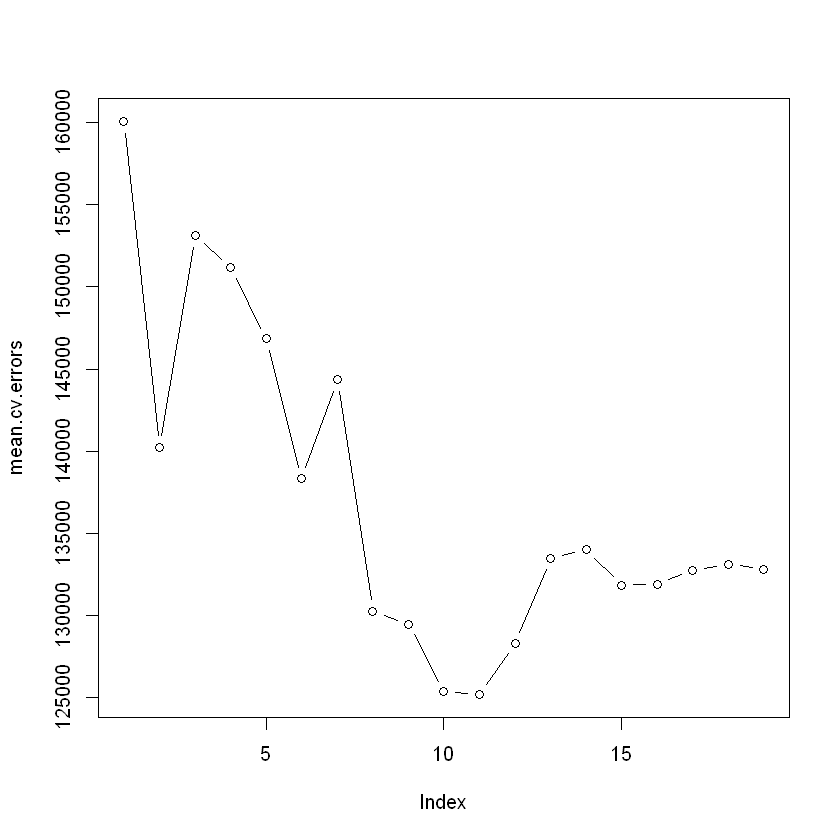

In [25]:
# 交叉验证选择了十一变量模型
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')

In [26]:
# 对整个数据集使用最优子集选择，获得十一变量模型的参数估计结果
reg.best=regsubsets(Salary~.,data=Hitters, nvmax=19)
coef(reg.best,11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

## 4.2 岭回归和lasso

In [27]:
# model.matrix()函数构造回归设计矩阵x，可以自动将定性变量转化为哑变量；glmnet()只能处理数值型输入变量，所以需要model.matrix()
x <- model.matrix(Salary ~ . , Hitters)[, -1] # 去掉第一列（自动生成的截距项）
y <- Hitters$Salary

### 4.2.1 岭回归

In [28]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



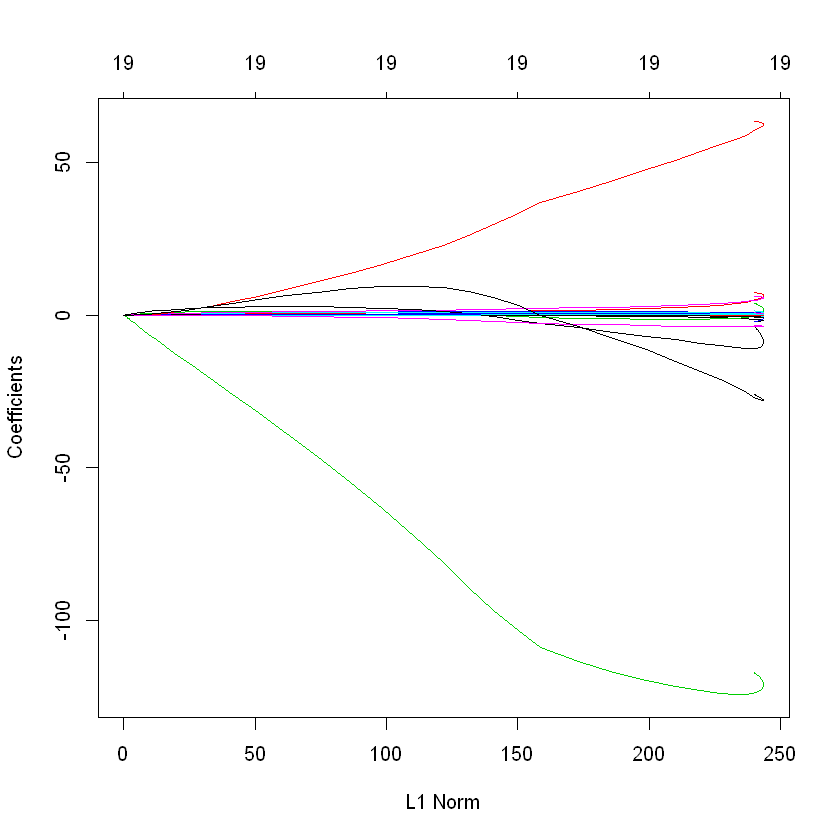

In [29]:
# glmnet()函数在默认设置下，自动选择lambda的范围进行岭回归；该例中选择了10^10到10^-2的范围进行岭回归，覆盖了只含截距项的空模型到最小二乘估计模型
# glmnet()函数默认对变量进行标准化，设置参数standardize=FALSE可以关闭标准化变量的默认设置
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda=grid) # alpha=0，岭回归；alpha=1，lasso模型
plot(ridge.mod)

In [30]:
# 系数向量存储在一个20*100的矩阵中，20行（每行对应一个变量）和100列（每列对应lambda的一个取值）
dim(coef(ridge.mod))

[1]  20 100

In [31]:
# 岭回归中，较大的lambda值得到的系数估计值远小于较小的lambda值得到的系数估计值
# lambda=11498时的系数估计结果
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

In [32]:
# lambda=705时的系数估计结果
ridge.mod$lambda[60]
coef(ridge.mod)[,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

In [33]:
# predict()函数可以获得新的lambda值对应的岭回归系数，如lambda=50
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

In [34]:
# 切分训练集和测试集
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]

In [35]:
# 基于训练集训练岭回归模型
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh=1e-12)

In [36]:
# 将type="coefficients"替换为newx参数，可以获得测试集上的预测值，并计算lambda=4时测试集的MSE
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 101036.8

In [37]:
# 如果lambda值非常大，会得到只包含截距项的模型
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

# 只包含截距项的模型，模型对测试集中每个观测给出的预测值，都为训练集数据的均值
mean((mean(y[train])-y.test)^2)

[1] 193253.1

[1] 193253.1

In [38]:
# lambda=0的岭回归模型是最小二乘回归
# predict()函数会对拟合glmnet()模型的lambda值进行插值，得出系数的近似估计值，所以需要设置exact=T
ridge.pred=predict(ridge.mod,s=0,newx=x[test,],exact=T)
mean((ridge.pred-y.test)^2)

[1] 114783.1

In [39]:
lm(y~x, subset=train)


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
  299.42849     -2.54027      8.36682     11.64512     -9.09923      2.44105  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
    9.23440    -22.93673     -0.18154     -0.11598     -1.33888      3.32838  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    0.07536     -1.07841     59.76065    -98.86233      0.34087      0.34165  
    xErrors  xNewLeagueN  
   -0.64207     -0.67442  


In [40]:
predict(ridge.mod,s=0,exact=T,type="coefficients")[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
299.42883596  -2.54014665   8.36611719  11.64400720  -9.09877719   2.44152119 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  9.23403909 -22.93584442  -0.18160843  -0.11561496  -1.33836534   3.32817777 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.07511771  -1.07828647  59.76529059 -98.85996590   0.34086400   0.34165605 
      Errors   NewLeagueN 
 -0.64205839  -0.67606314

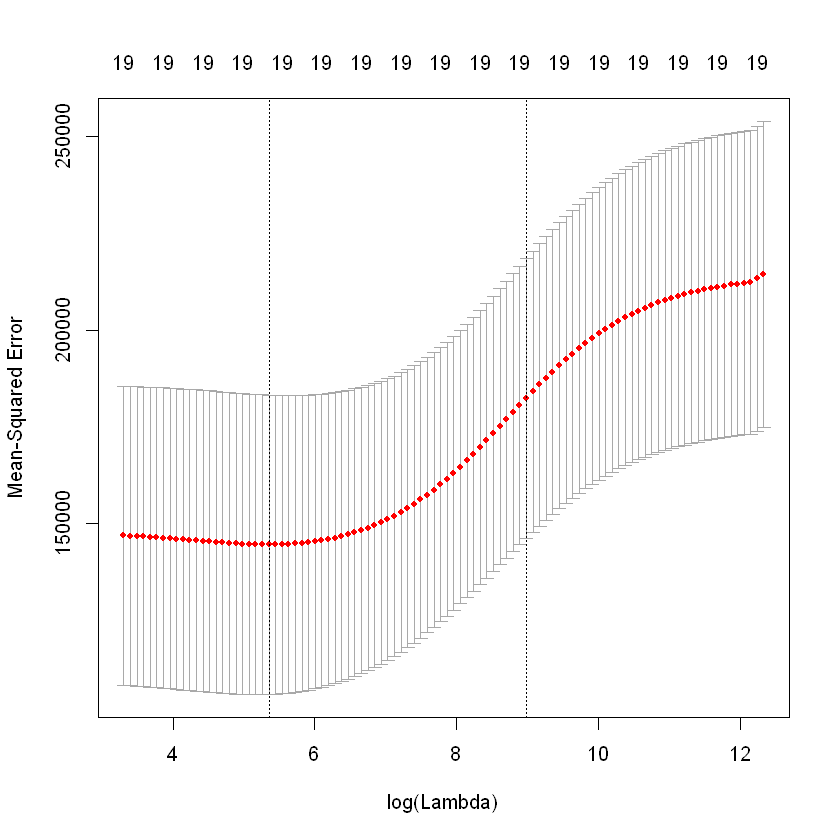

In [41]:
# cv.glmnet()函数默认使用十折交叉验证选择参数，使用folds参数来设置交叉验证的折数
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)

In [42]:
bestlam=cv.out$lambda.min
bestlam

[1] 211.7416

In [43]:
# 交叉验证误差最小的lambda为212
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 96015.51

In [44]:
# 基于整个数据集，使用交叉验证得到的lambda值，重新拟合岭回归模型
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

### 4.2.2 lasso

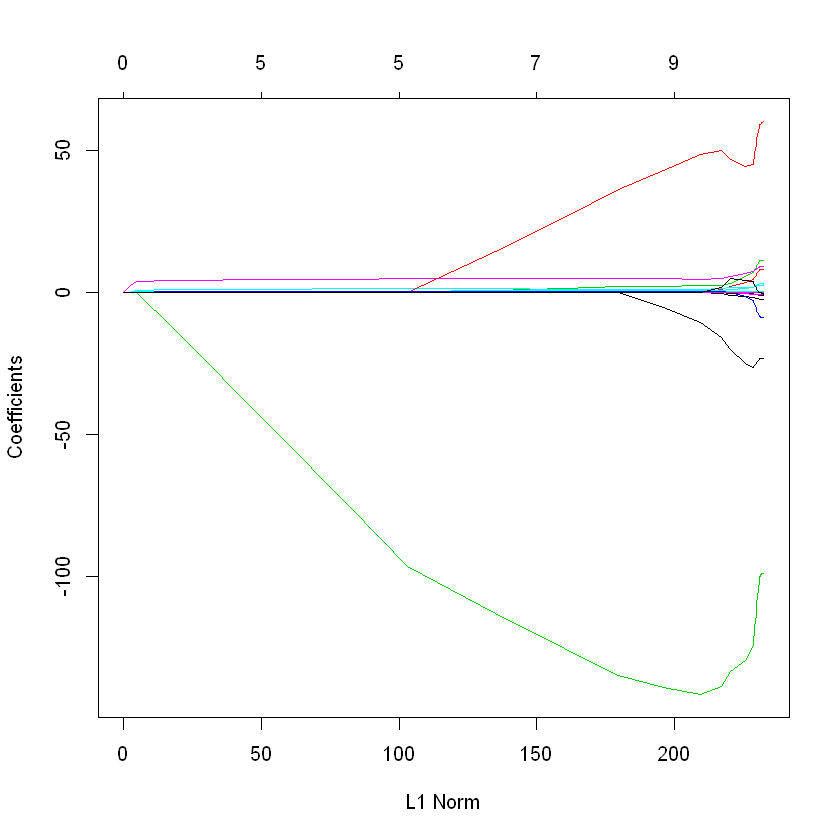

In [45]:
# glmnet()函数设置alpha=1，拟合lasso模型
lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

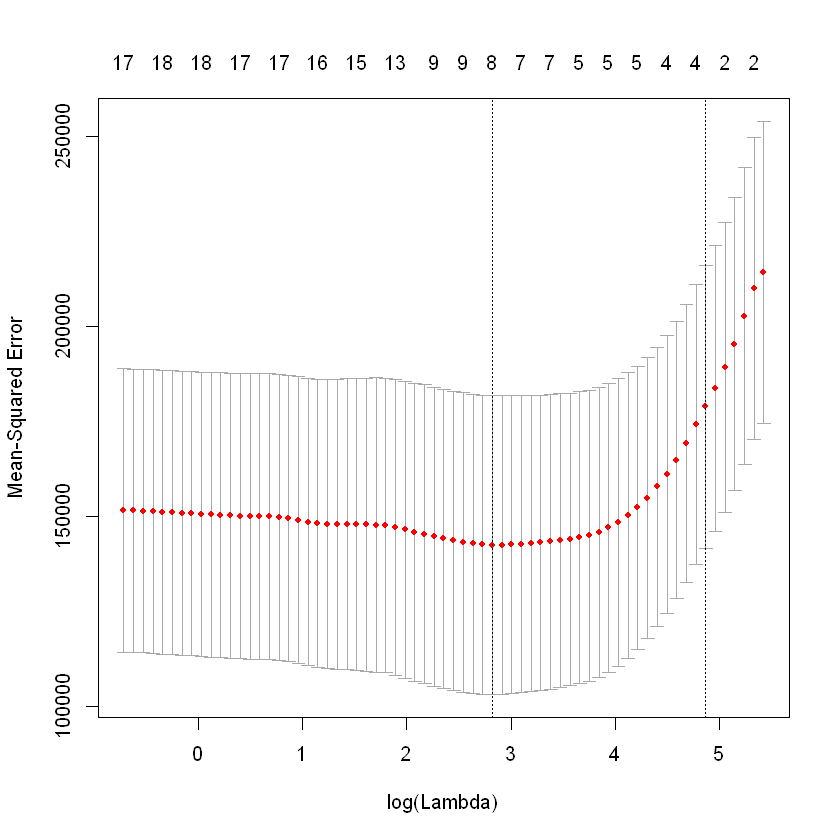

In [46]:
# 使用交叉验证选择lambda值
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)

In [47]:
# 使用交叉验证得出的最优lambda值，来拟合lasso模型；得出的结果明显优于OLS，和岭回归接近
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)

[1] 100743.4

In [48]:
# lasso优于岭回归的地方在于，系数估计结果是稀疏的，最终仅包含7个预测变量
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

In [49]:
lasso.coef[lasso.coef!=0]

(Intercept)         Hits        Walks        CRuns         CRBI      LeagueN 
  18.5394844    1.8735390    2.2178444    0.2071252    0.4130132    3.2666677 
   DivisionW      PutOuts 
-103.4845458    0.2204284

## 4.3 PCR和PLS回归

### 4.3.1 主成分回归

In [50]:
library(pls)

Warning message:
"package 'pls' was built under R version 3.3.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [51]:
# 使用Hitters数据集实践PCR方法，预测变量Salary（注意删除数据集中的缺失值）
# scale=TRUE在生成主成分之前标准化每个变量
# validation="CV"使用10折交叉验证选择主成分个数M
set.seed(2)
pcr.fit=pcr(Salary~., data=Hitters,scale=TRUE,validation="CV")

In [52]:
# 主成分M的取值从0开始
# 给出交叉验证的均方根误差（RMSE），4个主成分时RMSE为352.8
# 给出预测变量的被解释方差百分比和响应变量的被解释方差百分比，6个主成分能够提取预测变量88.63%的信息量，提取响应变量46.48%的信息量
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

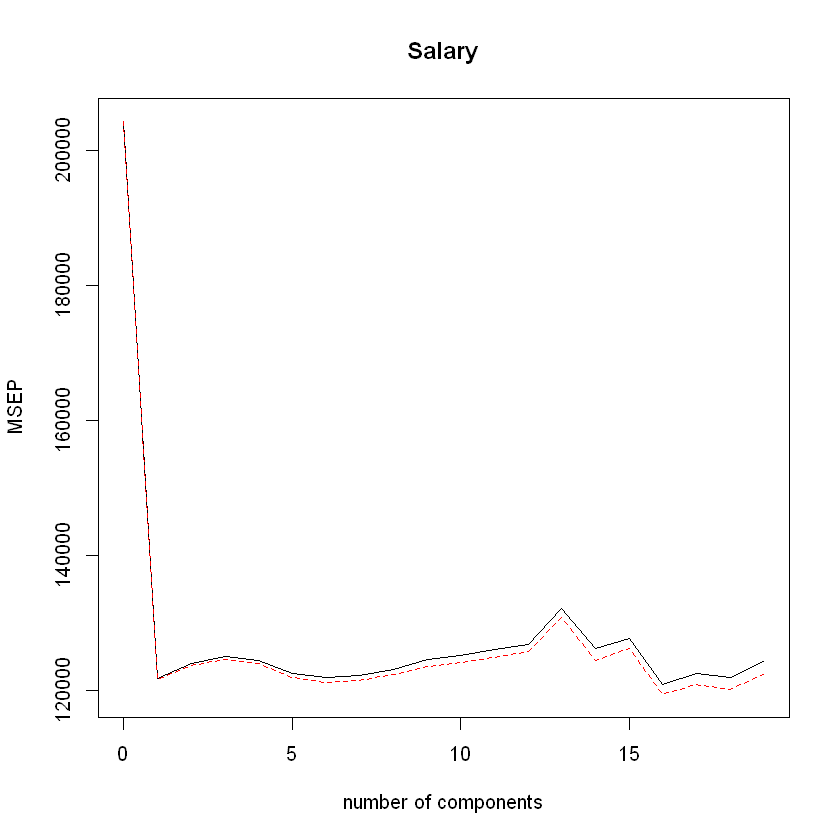

In [53]:
# validationplot()函数作出交叉验证得分的图像，纵轴默认为"RMSEP"，可以设置val.type="MSEP"
# M=16时，交叉验证误差最小，M=19时PCR模型相当于OLS（模型使用了所有的主成分，没有降维）
# M=1时交叉验证误差已经足够小，表明仅纳入少量成分的模型就足够了
validationplot(pcr.fit,val.type="MSEP")

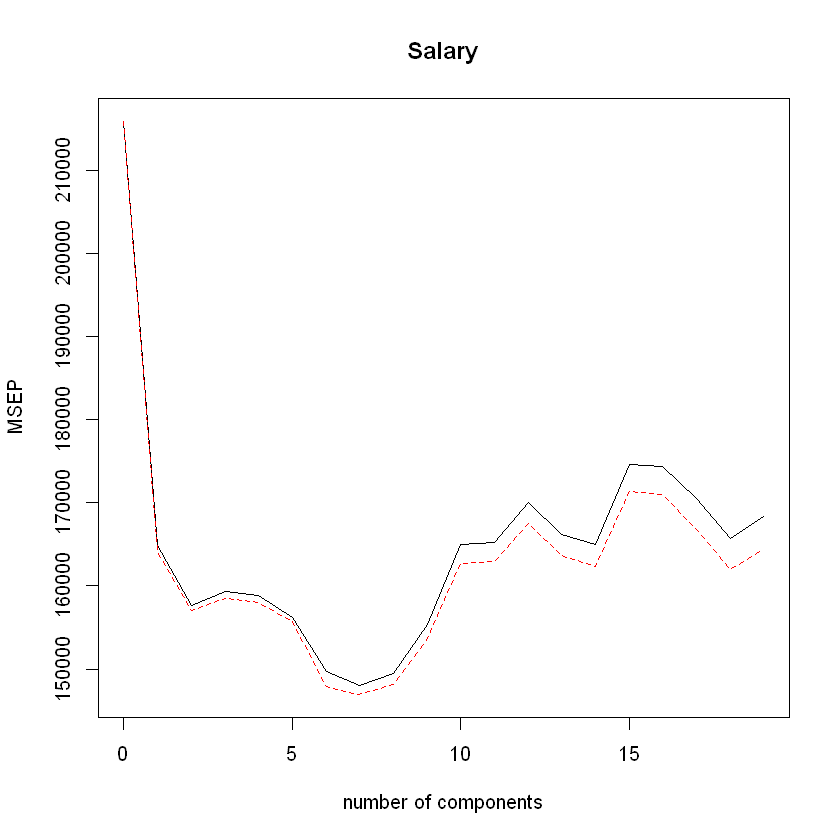

In [54]:
# 在训练集上使用PCR，并评价该方法在测试集上的表现
set.seed(1)
pcr.fit=pcr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")
validationplot(pcr.fit,val.type="MSEP")

In [55]:
# M=7时交叉验证误差最小，计算测试集MSE
# 在该数据集上，PCR模型的拟合效果比岭回归和lasso更有优势；但是PCR的问题在于模型更难以解释，因为PCR并没有进行变量筛选或直接估计出系数值
pcr.pred=predict(pcr.fit,x[test,],ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

In [56]:
# 在整个数据集上拟合M=7的PCR模型
pcr.fit=pcr(y~x,scale=TRUE,ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


### 4.3.2 偏最小二乘回归

In [57]:
# pls库中的plsr()函数拟合偏最小二乘回归，语法与pcr()函数类似
set.seed(1)
pls.fit=plsr(Salary~., data=Hitters,subset=train,scale=TRUE, validation="CV")

In [58]:
# M=2时交叉验证误差最小
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

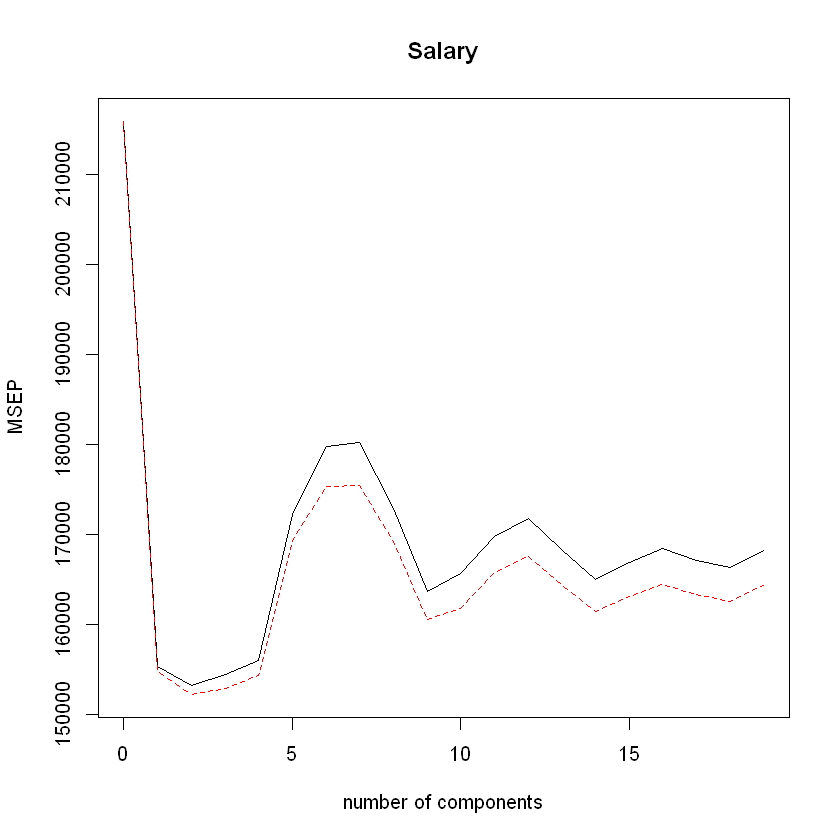

In [59]:
validationplot(pls.fit,val.type="MSEP")

In [60]:
# 计算测试集MSE
pls.pred=predict(pls.fit,x[test,],ncomp=2)
mean((pls.pred-y.test)^2)

[1] 101417.5

In [61]:
# 使用M=2在整个数据集上建立PLS模型
# M=2的PLS能够解释Salary46.40%的方差，与M=7的PCR解释Salary46.69%基本相同
# 原因在于PCR的目的是使预测变量可解释的方差最大化，而PLS旨在寻找可以同时解释预测变量方差和响应变量方差的方向
pls.fit=plsr(Salary~., data=Hitters,scale=TRUE,ncomp=2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40
